## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [37]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier


#install scikit-optimize
#!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
#Get the column names
print([i for i in df.columns])

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [4]:
#Get high level statistical view of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

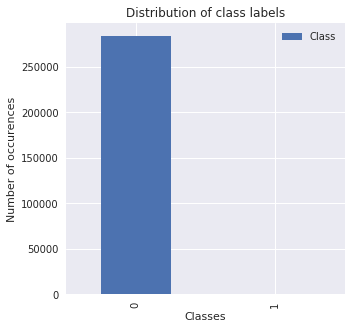

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

#Check the class distribution in the given data
df['Class'].value_counts().plot(figsize=(5,5),kind='bar',legend='True')
plt.title("Distribution of class labels")
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.show()

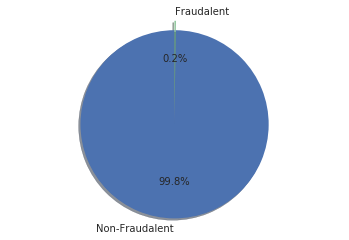

In [6]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [7]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


In [8]:
# Create a scatter plot to observe the distribution of classes with time
 
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


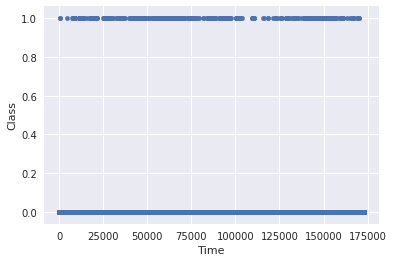

In [9]:
ax1=df.plot.scatter(x='Time', y='Class')
plt.show()

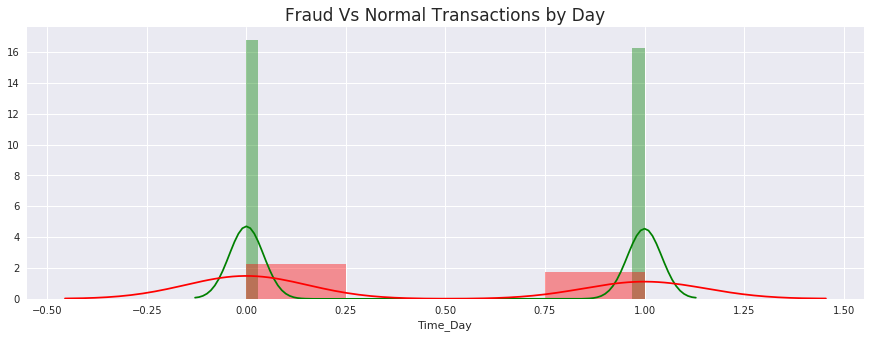

In [10]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

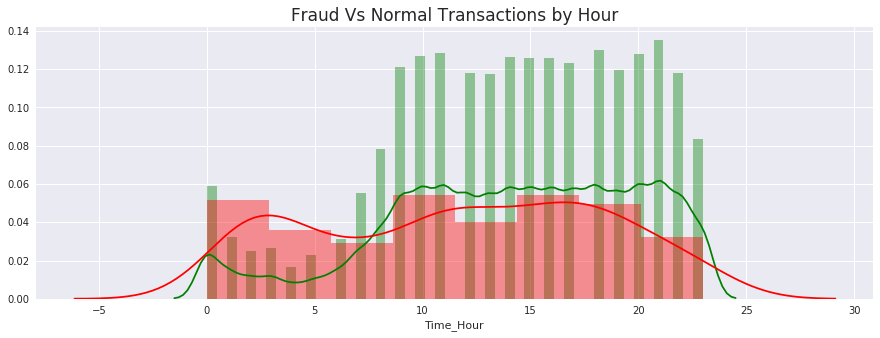

In [11]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


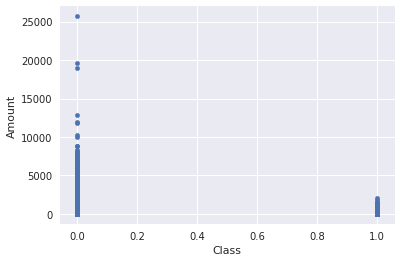

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount

ax2=df.plot.scatter(x='Class', y='Amount')
plt.show()

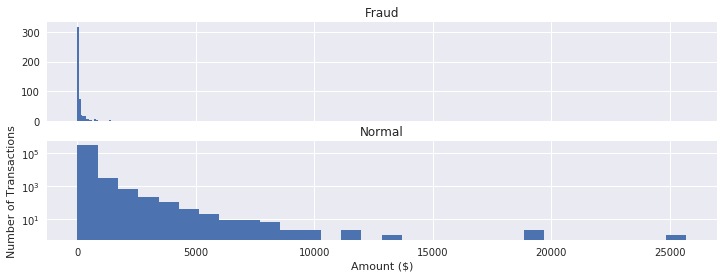

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [14]:
#Correlation

print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413


In [15]:
# Drop unnecessary columns

# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [16]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


### Splitting the data into train & test data

In [17]:
y= df['Class']
X = df.drop(['Class'], axis=1)

In [18]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [20]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

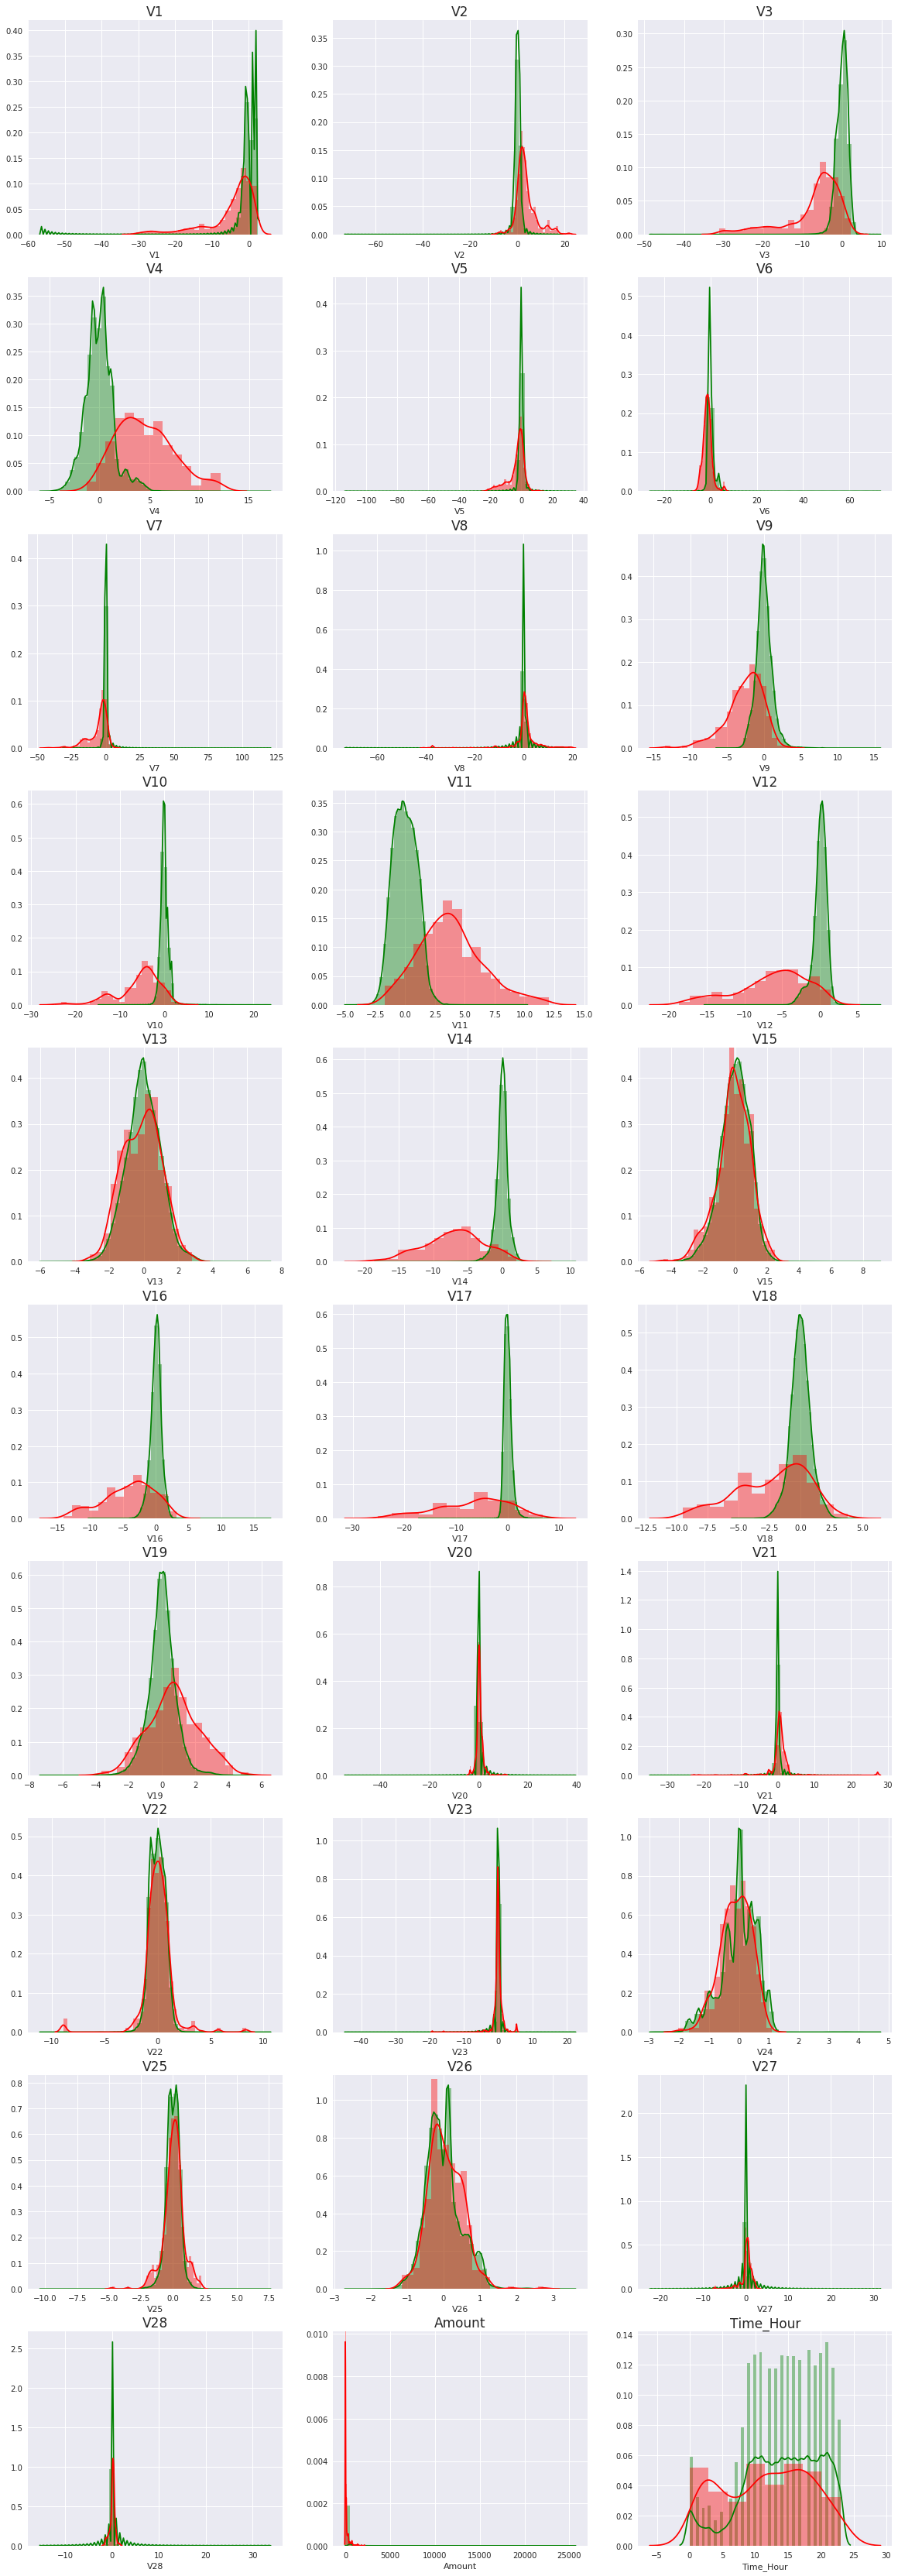

In [21]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [22]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [23]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

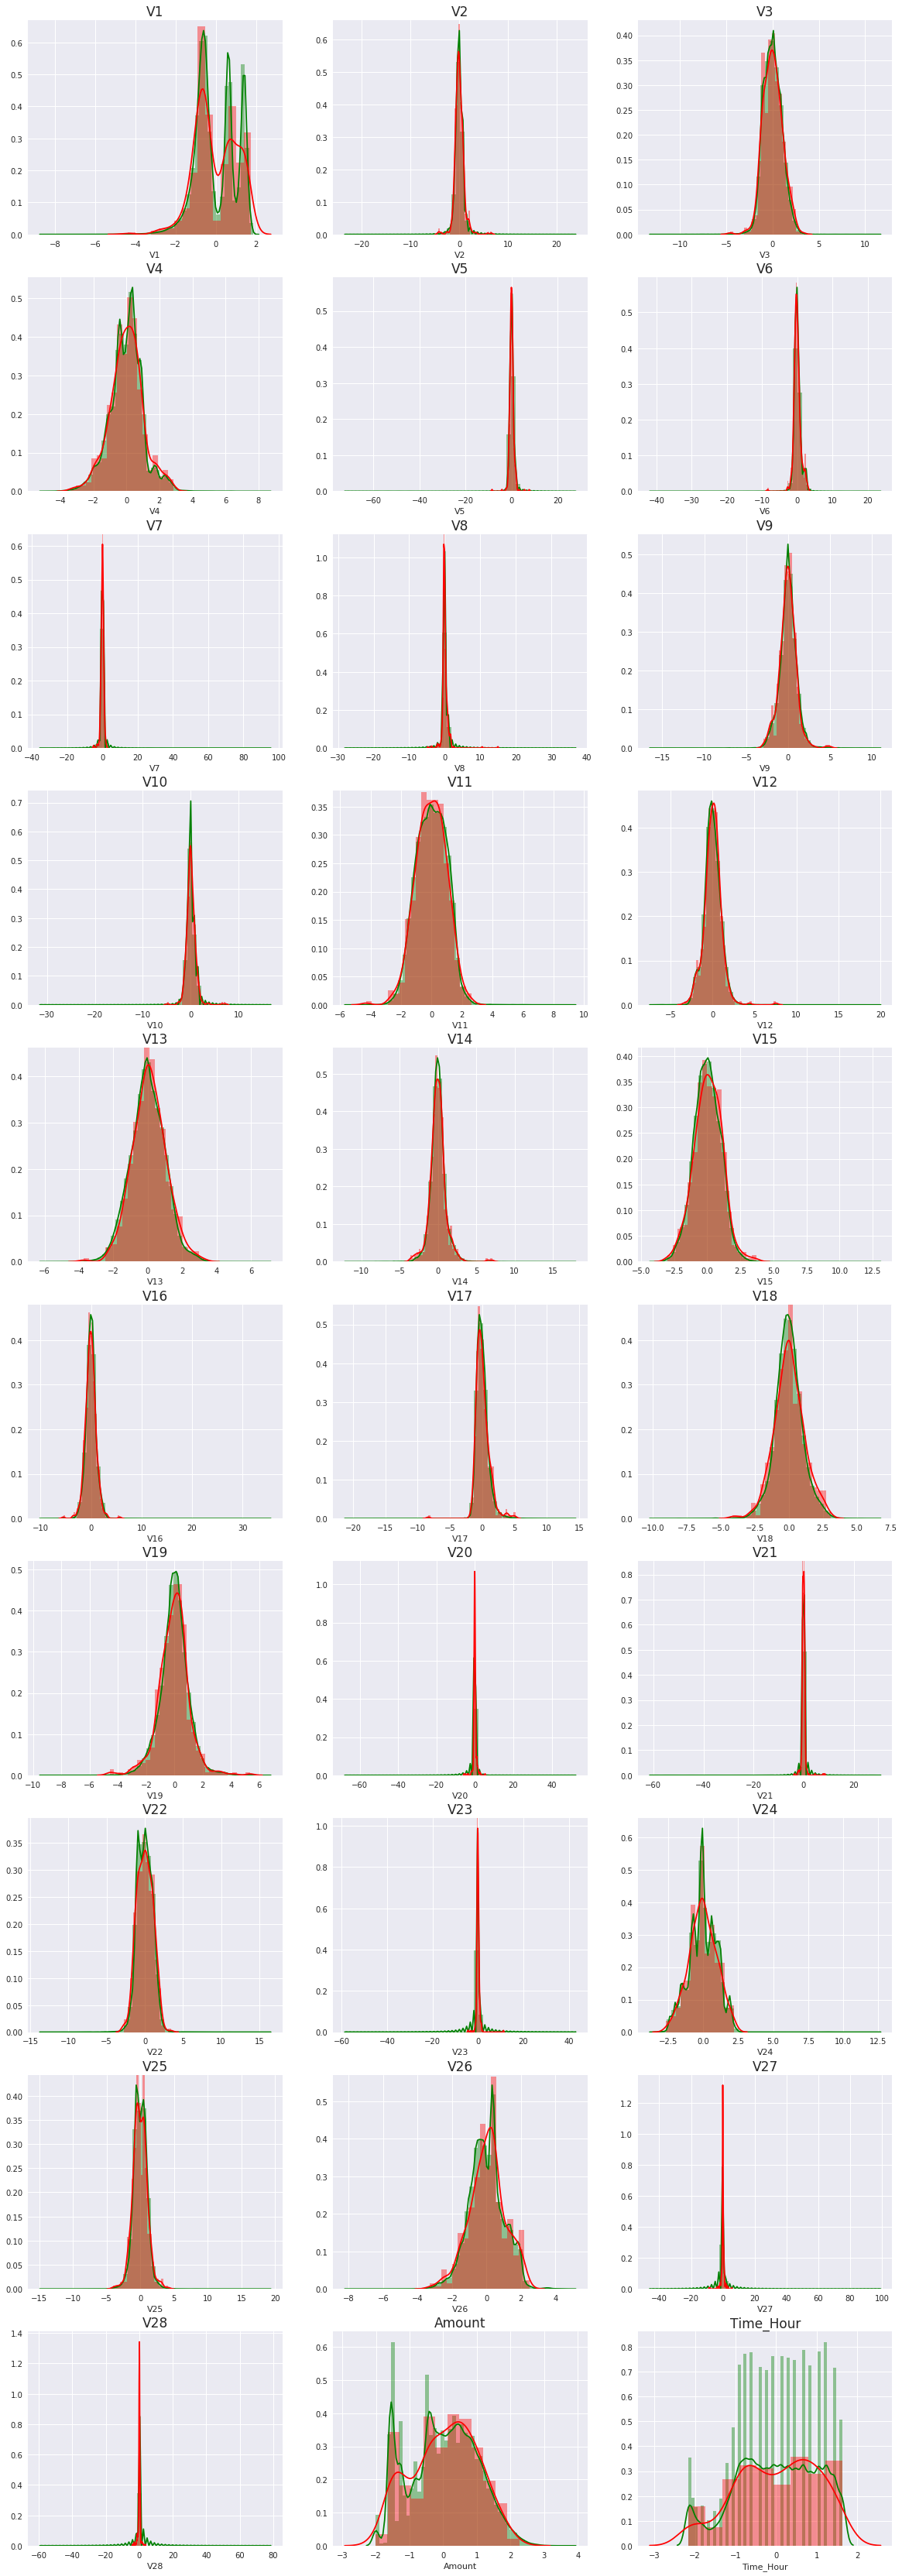

In [24]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

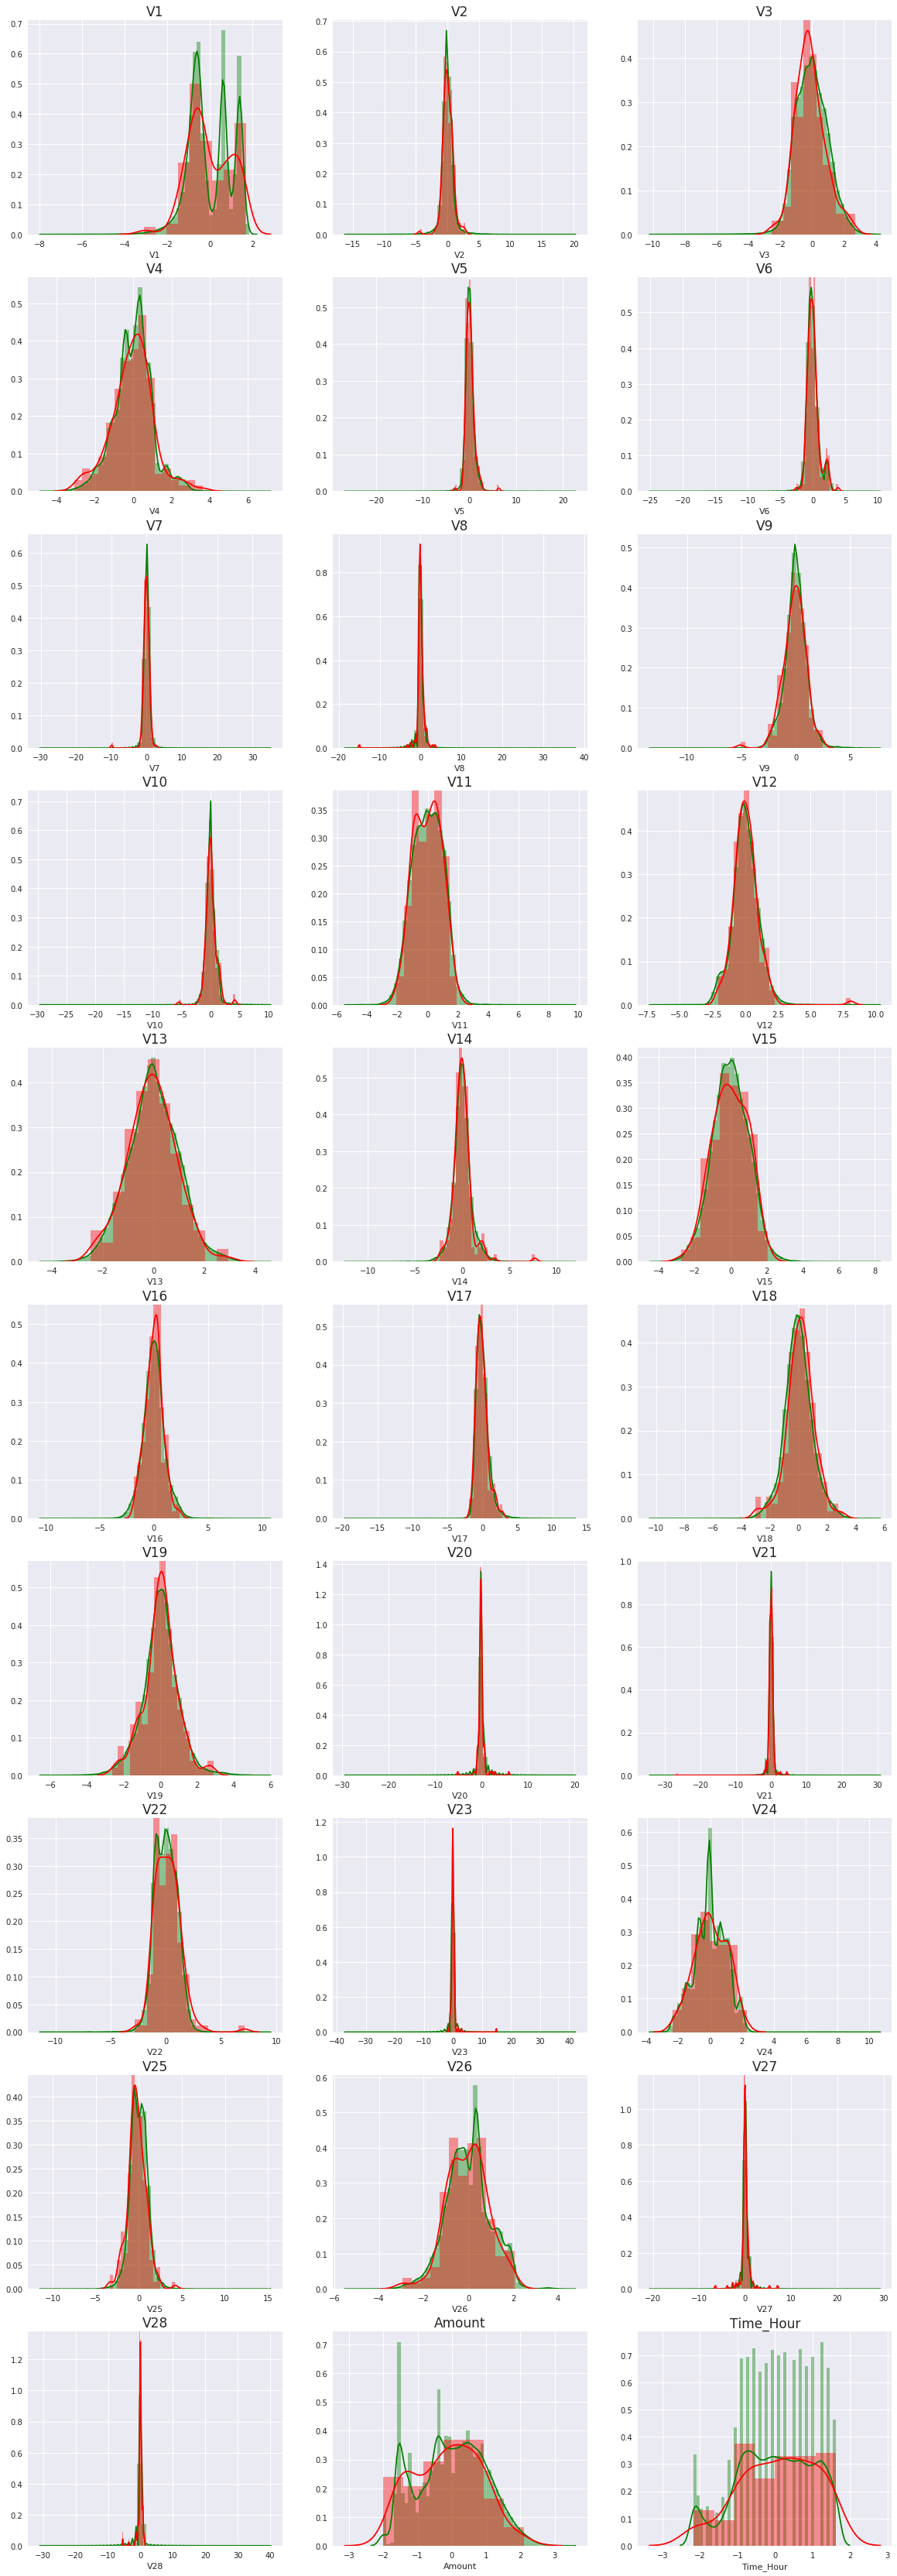

In [25]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

### Defining separate functions for each model that is being built

In [26]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [27]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

### Function for Logistic Regression Model

In [29]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  #print("Parameters for l2 regularisations")
  #print(searchCV_l2.coef_)
  #print(searchCV_l2.intercept_) 
  #print(searchCV_l2.scores_) 

  #print("Parameters for l1 regularisations")
  #print(searchCV_l1.coef_)
  #print(searchCV_l1.intercept_) 
  #print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

### Function for KNN Model

In [30]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### Function for SVM Model

In [31]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### Function for Tree model

In [32]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### Function for Random Forest

In [33]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### Function for XGBoost Model

In [34]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### Build the above mentioned classification models

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983760023970567
Max auc_roc for l1: 0.985410899045824
Accuarcy of Logistic model with l2 regularisation : 0.9989993328885924
Confusion Matrix


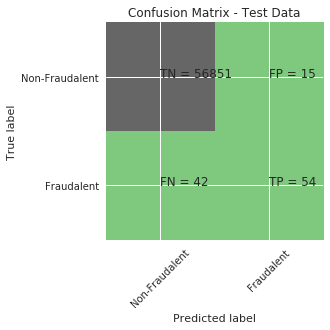

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


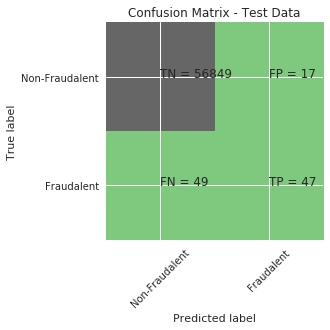

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.0012891785844297901
ROC for the test dataset 96.7%


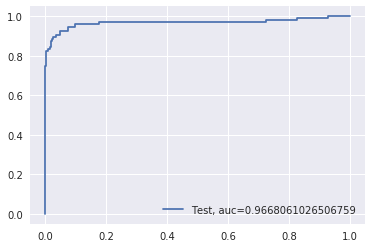

l1 roc_value: 0.9639030791685718
l1 threshold: 0.00927649384502573
ROC for the test dataset 96.4%


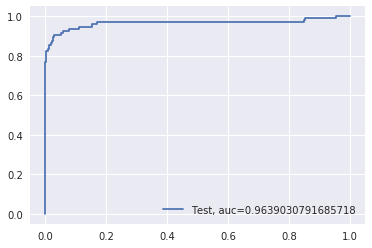

KNN Model
model score
0.9992977774656788
Confusion Matrix


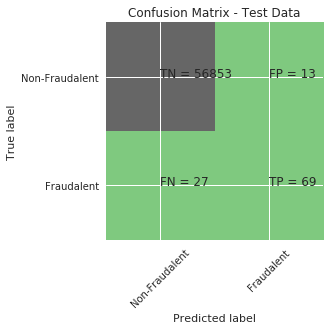

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


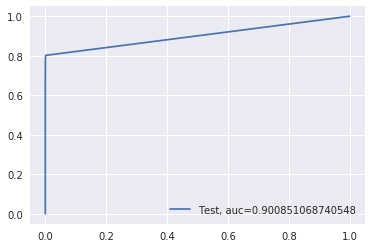

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


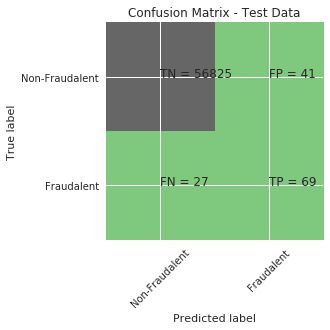

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


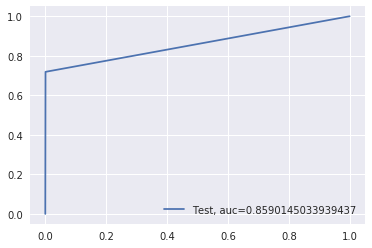

entropy score: 0.9990519995786665
Confusion Matrix


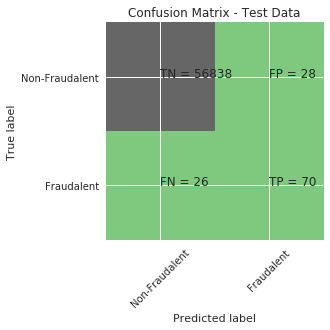

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


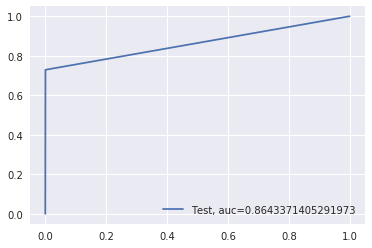

Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


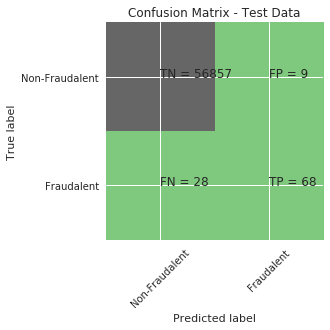

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


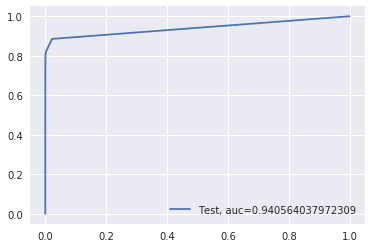

XGBoost Model
[11:13:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994557775359011
Confusion Matrix


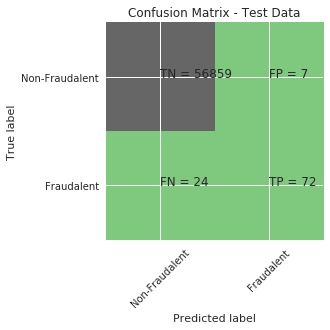

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9729984744838743
XGBoost threshold: 5.146719195181504e-05
ROC for the test dataset 97.3%


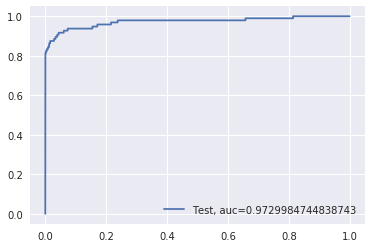

SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


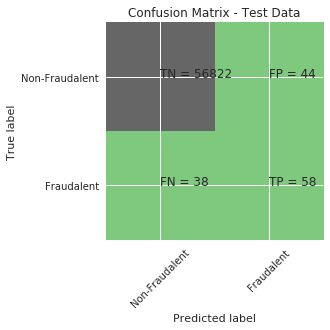

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913401314786809
SVM threshold: 0.0009835007383353137
ROC for the test dataset 89.1%


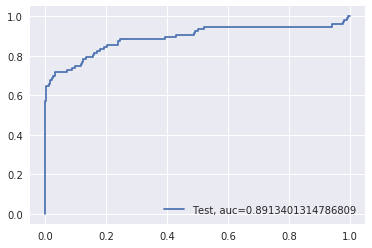

In [38]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")

df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

#Run KNN Model
print("KNN Model")

df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

#Run Random Forest Model
print("Random Forest Model")

df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

#Run XGBoost Modela
print("XGBoost Model")

df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")

df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)


In [39]:
df_Results.head()

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337,1.000000


### Perform cross validation with StratifiedKFold

In [40]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9826291650952385
Max auc_roc for l1: 0.9652106893977332
Accuarcy of Logistic model with l2 regularisation : 0.998771088990713
Confusion Matrix


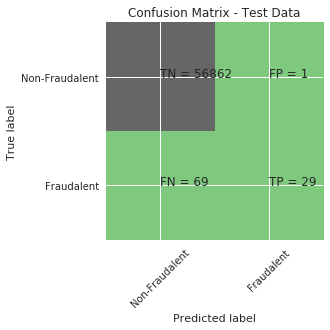

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9987535331191517
Confusion Matrix


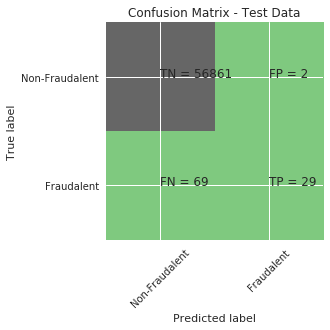

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9832865386803298
l2 threshold: 0.0015832728695621585
ROC for the test dataset 98.3%


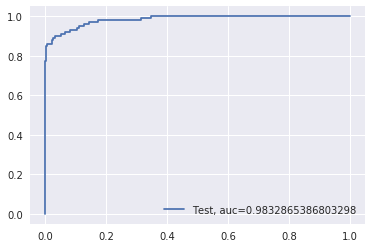

l1 roc_value: 0.8890758561483437
l1 threshold: 0.021087492766199985
ROC for the test dataset 88.9%


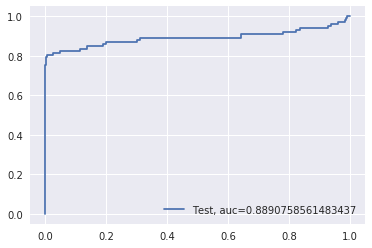

KNN Model
model score
0.9991924299081828
Confusion Matrix


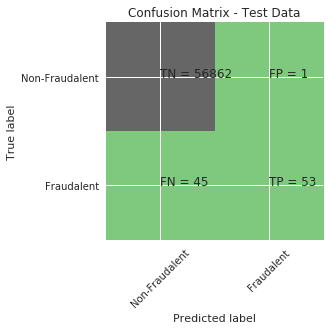

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


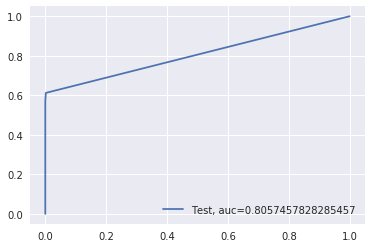

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


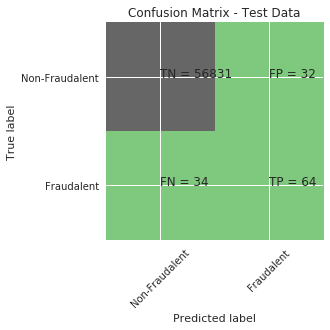

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


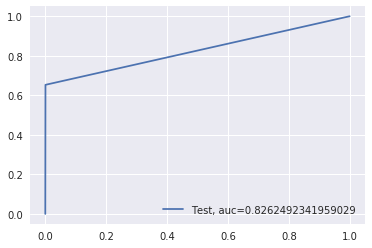

entropy score: 0.9990168711925703
Confusion Matrix


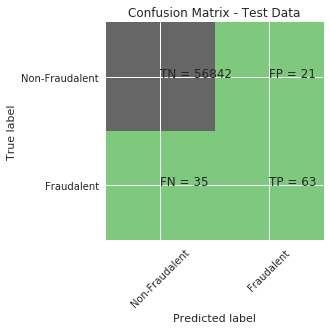

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


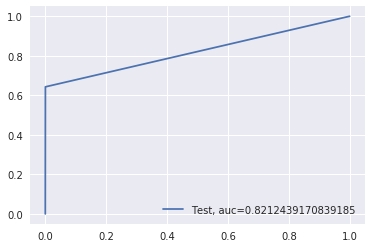

Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


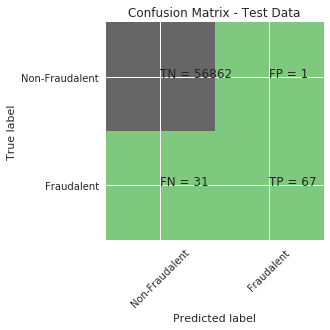

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


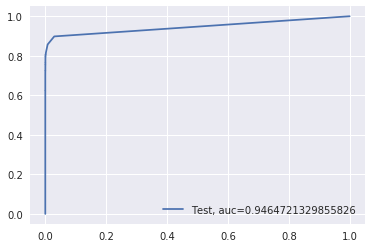

XGBoost Model
[11:58:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994382121100402
Confusion Matrix


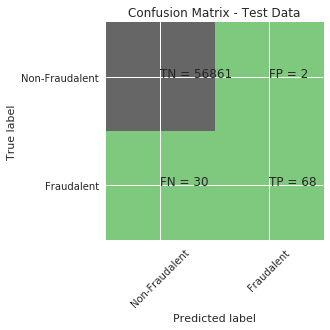

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9728122049164354
XGBoost threshold: 0.00010038168693426996
ROC for the test dataset 97.3%


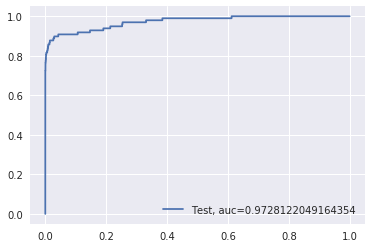

SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


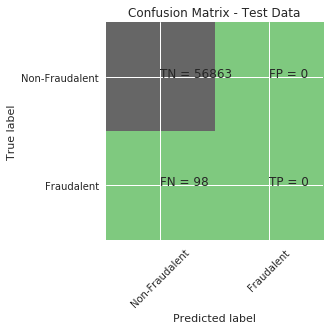

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.0043264078201598775
ROC for the test dataset 40.2%


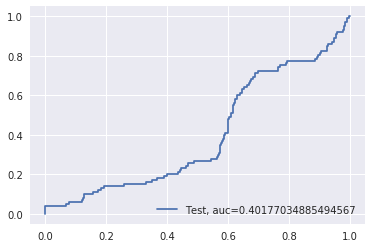

In [42]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")

df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

#Run KNN Model
print("KNN Model")

df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

#Run Random Forest Model
print("Random Forest Model")

df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

#Run XGBoost Modela
print("XGBoost Model")

df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")

df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

In [43]:
print('he')

he


In [44]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337,1.000000
5,Power Transformer,Random Forest,0.999350,0.940564,0.010000
6,Power Transformer,XGBoost,0.999456,0.972998,0.000051
7,Power Transformer,SVM,0.998560,0.891340,0.000984
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998771,0.983287,0.001583
9,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998754,0.889076,0.021087


As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results

### Build model with best values that give good results

In [45]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


#print("Parameters for l2 regularisations")
#print(searchCV_l2.coef_)
#print(searchCV_l2.intercept_) 
#print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9862289791027475
Accuarcy of Logistic model with l2 regularisation : 0.9988764439450862
l2 roc_value: 0.975453808075124
l2 threshold: 0.0013428331904667631


In [46]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

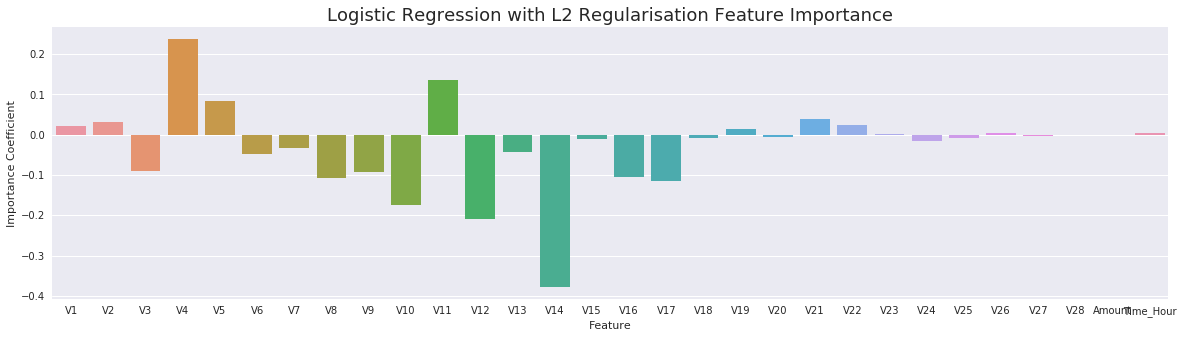

In [47]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions

### Balancing Techniques

### Undersampling

In [48]:
from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9841489249914991
Max auc_roc for l1: 0.5
Accuarcy of Logistic model with l2 regularisation : 0.9966468873986166
Confusion Matrix


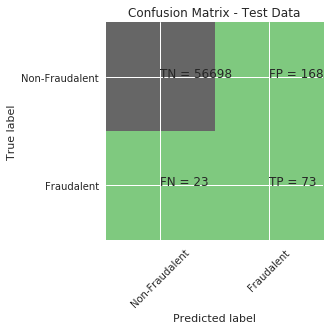

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.30      0.76      0.43        96

    accuracy                           1.00     56962
   macro avg       0.65      0.88      0.72     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


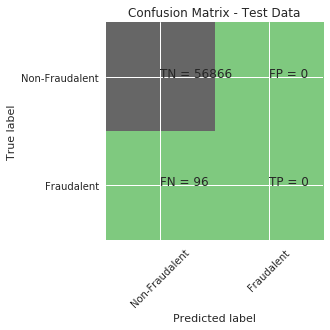

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9665221749375725
l2 threshold: 0.13472022384119484
ROC for the test dataset 96.7%


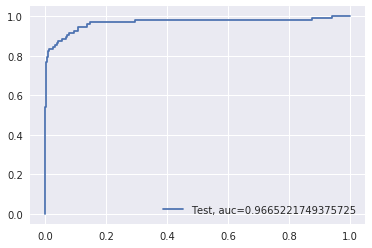

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


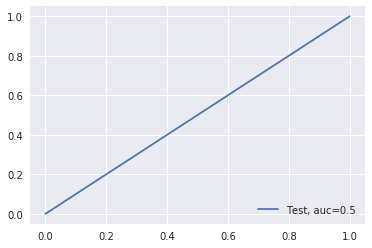

KNN Model
model score
0.9765457673536744
Confusion Matrix


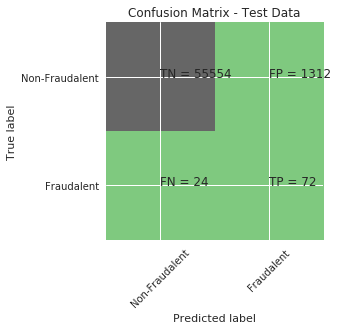

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.05      0.75      0.10        96

    accuracy                           0.98     56962
   macro avg       0.53      0.86      0.54     56962
weighted avg       1.00      0.98      0.99     56962

KNN roc_value: 0.9436731380203754
KNN threshold: 0.4
ROC for the test dataset 94.4%


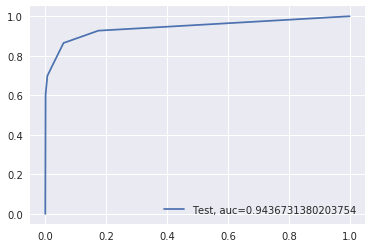

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9455601980267547
Confusion Matrix


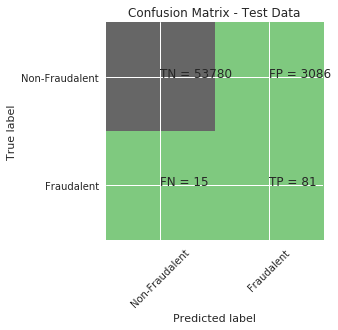

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.95      0.97     56962

gini tree_roc_value: 0.8947410359441494
Tree threshold: 1.0
ROC for the test dataset 89.5%


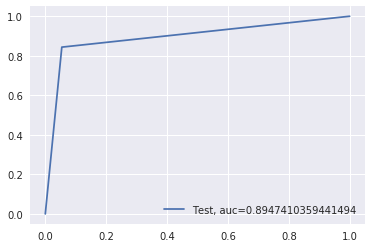

entropy score: 0.9536182016080896
Confusion Matrix


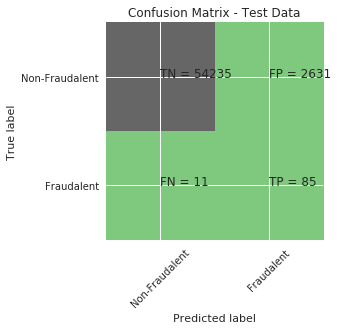

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56866
           1       0.03      0.89      0.06        96

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962

entropy tree_roc_value: 0.9195750023446934
Tree threshold: 1.0
ROC for the test dataset 92.0%


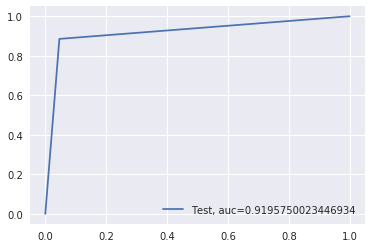

Random Forest Model
Model Accuracy: 0.988746883887504
Confusion Matrix


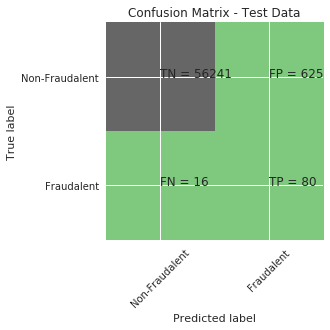

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.83      0.20        96

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9765741318772787
Random Forest threshold: 0.3
ROC for the test dataset 97.7%


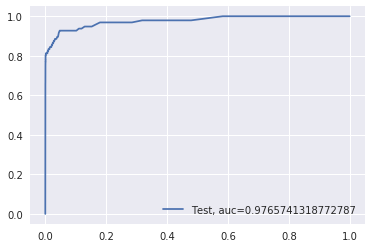

XGBoost Model
[12:49:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9822688810083916
Confusion Matrix


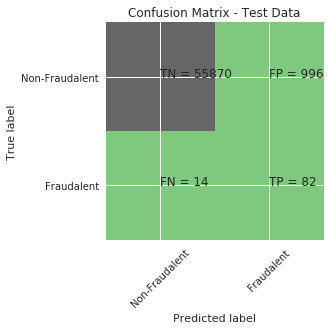

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.08      0.85      0.14        96

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962

XGboost roc_value: 0.9833382974888334
XGBoost threshold: 0.04495028778910637
ROC for the test dataset 98.3%


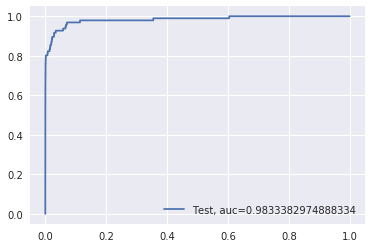

SVM Model with Sigmoid Kernel
accuracy_score : 0.8819388364172607
Confusion Matrix


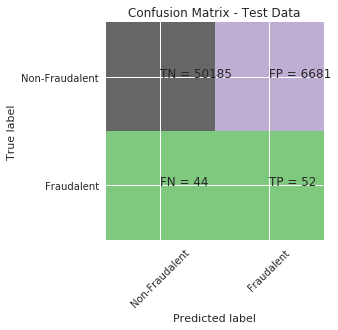

classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     56866
           1       0.01      0.54      0.02        96

    accuracy                           0.88     56962
   macro avg       0.50      0.71      0.48     56962
weighted avg       1.00      0.88      0.94     56962

SVM roc_value: 0.3042534569572914
SVM threshold: 0.25845623107271437
ROC for the test dataset 30.4%


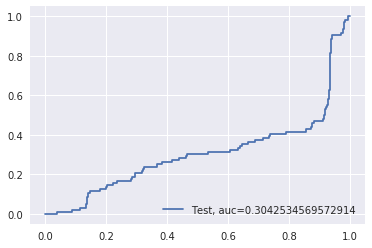

In [49]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")

df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)

#Run KNN Model
print("KNN Model")

df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)

#Run XGBoost Model
print("XGBoost Model")

df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")

df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)


In [50]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337,1.000000
5,Power Transformer,Random Forest,0.999350,0.940564,0.010000
6,Power Transformer,XGBoost,0.999456,0.972998,0.000051
7,Power Transformer,SVM,0.998560,0.891340,0.000984
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998771,0.983287,0.001583
9,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998754,0.889076,0.021087


It seems Undersampling has impoved the XGBoost Results

### Random Oversampling with StratifiedKFold

In [51]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

<b>Since oversampling takes lot of time, am going to build selective models<b>

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9863673993850138
Max auc_roc for l1: 0.5
Accuarcy of Logistic model with l2 regularisation : 0.9866048699987711
Confusion Matrix


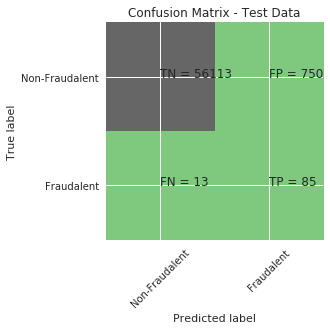

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


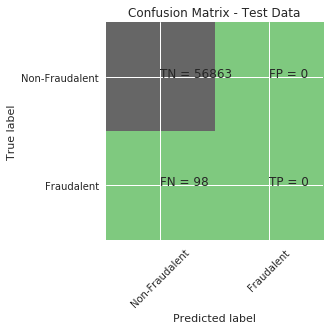

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9808501421425717
l2 threshold: 0.31940027147761957
ROC for the test dataset 98.1%


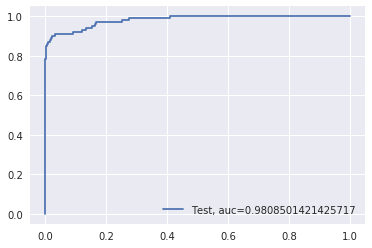

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


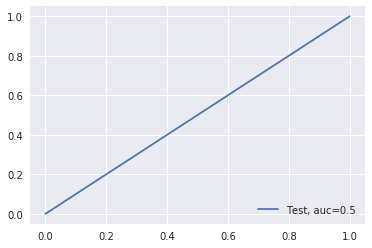

KNN Model
model score
0.9980688541282632
Confusion Matrix


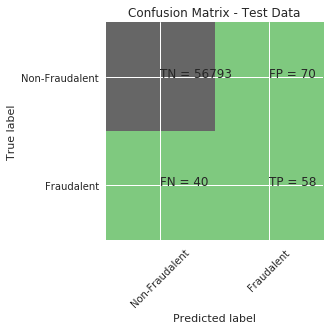

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


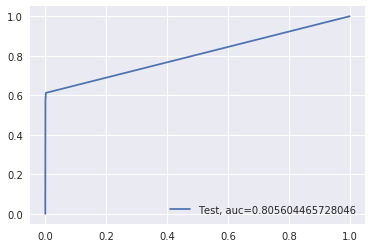

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990519829356929
Confusion Matrix


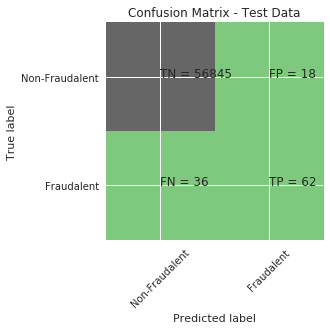

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.63      0.70        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8161682554596852
Tree threshold: 1.0
ROC for the test dataset 81.6%


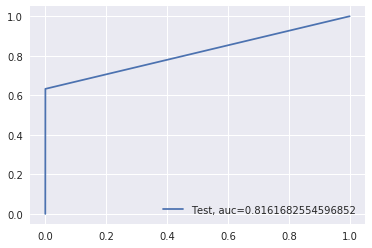

entropy score: 0.9991924299081828
Confusion Matrix


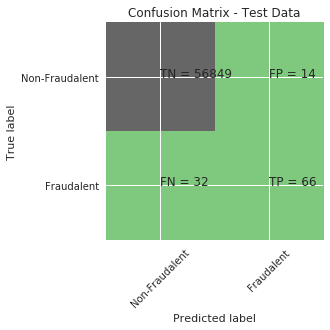

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.67      0.74        98

    accuracy                           1.00     56961
   macro avg       0.91      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8366115909811157
Tree threshold: 1.0
ROC for the test dataset 83.7%


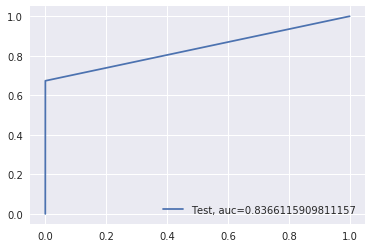

Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


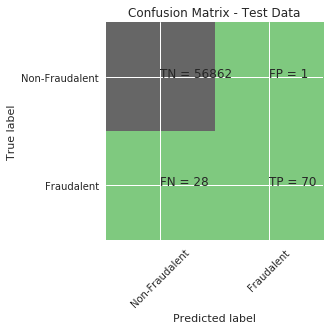

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9461288445877973
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


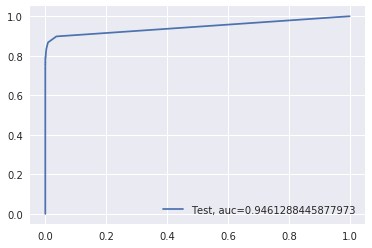

XGBoost Model
[13:37:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.999490879724724
Confusion Matrix


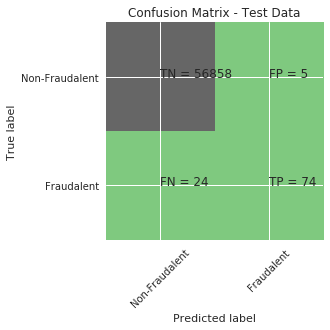

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.979463798955384
XGBoost threshold: 5.948160105617717e-05
ROC for the test dataset 97.9%


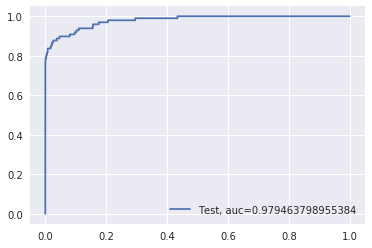

In [52]:
Data_Imbalance_Handiling = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")

df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)

#Run KNN Model
print("KNN Model")

df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)

#Run Random Forest Model
print("Random Forest Model")

df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)

#Run XGBoost Model
print("XGBoost Model")

df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)


In [53]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337,1.000000
5,Power Transformer,Random Forest,0.999350,0.940564,0.010000
6,Power Transformer,XGBoost,0.999456,0.972998,0.000051
7,Power Transformer,SVM,0.998560,0.891340,0.000984
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998771,0.983287,0.001583
9,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998754,0.889076,0.021087


<b>Looking at Accuracy and ROC value we have XGBoost which has provided best results for Random oversampling technique<b>

### SMOTE Oversampling with StratifiedKFold

In [70]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 


# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do



#X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


#plt.rcParams['figure.figsize'] = [20, 20]
#fig = plt.figure()

#plt.subplot(3, 1, 1)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.legend()

#plt.subplot(3, 1, 2)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
#            label='Artificial SMOTE Class-1 Examples')
#plt.legend()

#plt.subplot(3, 1, 3)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
#plt.legend()


#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [71]:
#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [72]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9930149277910345
Max auc_roc for l1: 0.5
Accuarcy of Logistic model with l2 regularisation : 0.9835325924755535
Confusion Matrix


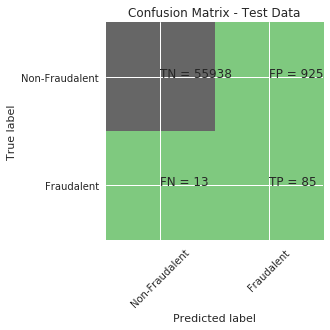

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


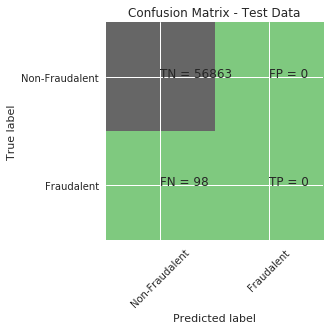

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9745803285878303
l2 threshold: 0.3940483751942391
ROC for the test dataset 97.5%


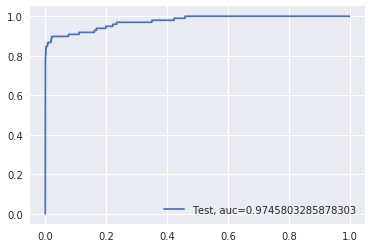

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


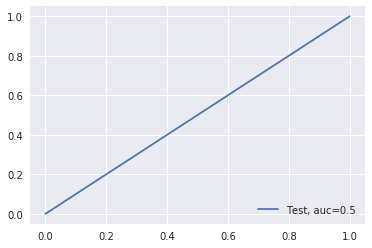

KNN Model
model score
0.9946805709169432
Confusion Matrix


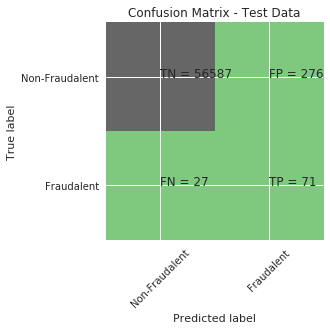

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


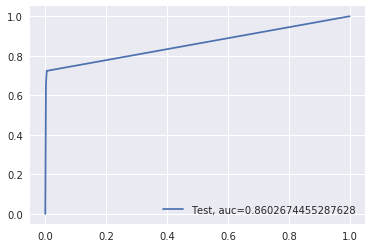

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix


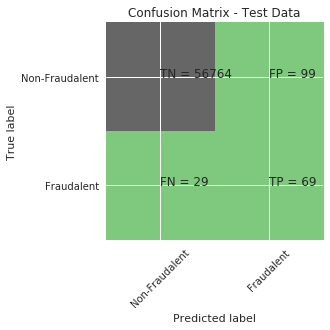

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


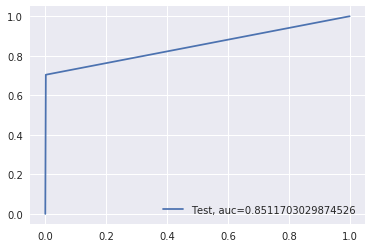

entropy score: 0.9969803900914661
Confusion Matrix


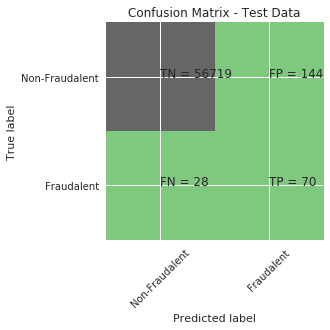

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


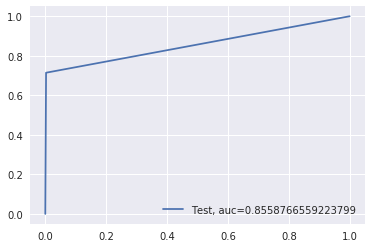

Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


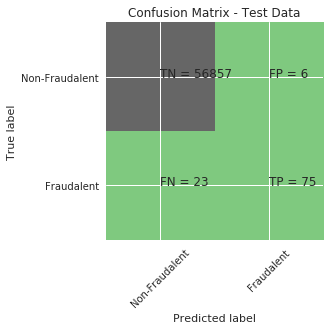

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


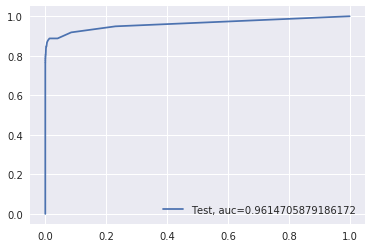

XGBoost Model
[15:19:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994382121100402
Confusion Matrix


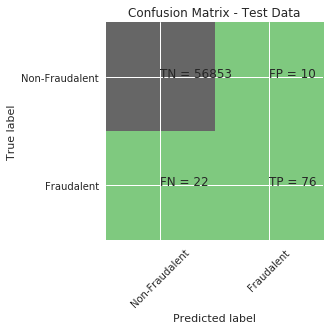

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56961
   macro avg       0.94      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9741530574560336
XGBoost threshold: 0.00022058551257941872
ROC for the test dataset 97.4%


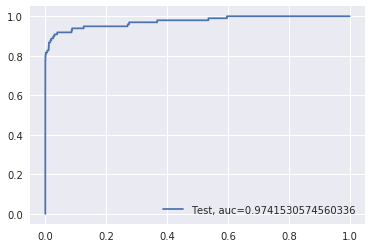

In [73]:
Data_Imbalance_Handiling = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")

df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)

#Run KNN Model
print("KNN Model")

df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)

#Run Random Forest Model
print("Random Forest Model")

df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)

#Run XGBoost Model
print("XGBoost Model")

df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)


In [74]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337,1.000000
5,Power Transformer,Random Forest,0.999350,0.940564,0.010000
6,Power Transformer,XGBoost,0.999456,0.972998,0.000051
7,Power Transformer,SVM,0.998560,0.891340,0.000984
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998771,0.983287,0.001583
9,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998754,0.889076,0.021087


<b>Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique<b>

### ADASYN Oversampling Technique with StratifiedKFold

In [77]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
#ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do


#X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams['figure.figsize'] = [20, 20]
#fig = plt.figure()

#plt.subplot(3, 1, 1)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.legend()

#plt.subplot(3, 1, 2)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
#            label='Artificial ADASYN Class-1 Examples')
#plt.legend()

#plt.subplot(3, 1, 3)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
#plt.legend()

In [78]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9835134047376739
Max auc_roc for l1: 0.5
Accuarcy of Logistic model with l2 regularisation : 0.9579712434823827
Confusion Matrix


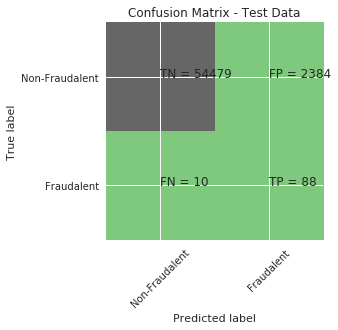

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


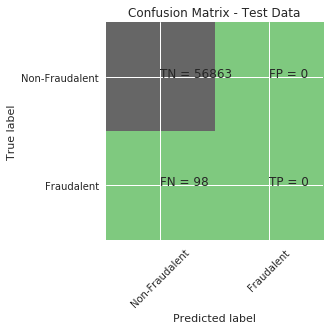

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9740305826356006
l2 threshold: 0.6116529226709898
ROC for the test dataset 97.4%


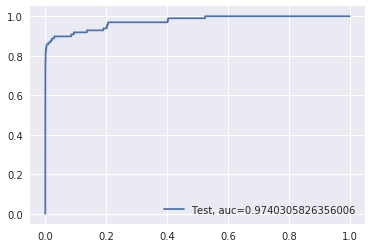

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


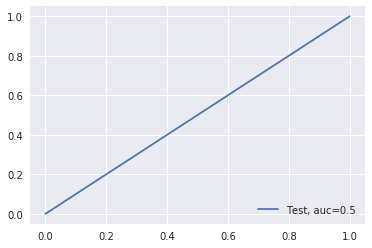

KNN Model
model score
0.9945050122013307
Confusion Matrix


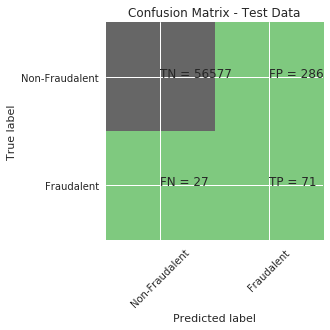

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


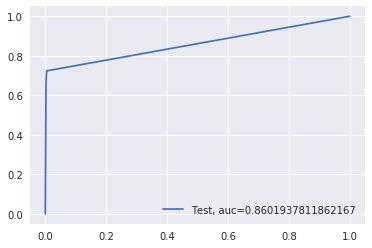

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979459630273345
Confusion Matrix


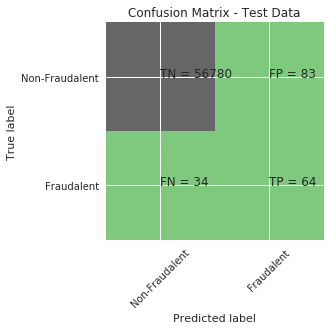

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8258007879303172
Tree threshold: 1.0
ROC for the test dataset 82.6%


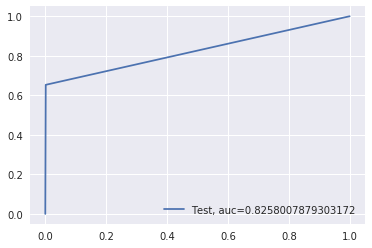

entropy score: 0.9954179175225154
Confusion Matrix


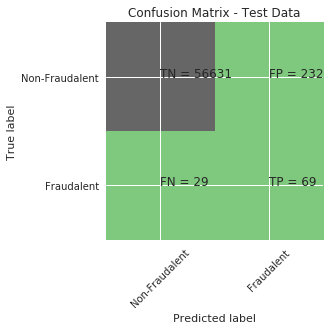

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8500008254713172
Tree threshold: 1.0
ROC for the test dataset 85.0%


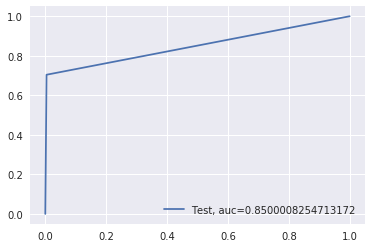

Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


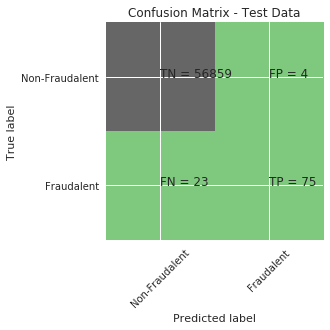

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9632269575962563
Random Forest threshold: 0.03
ROC for the test dataset 96.3%


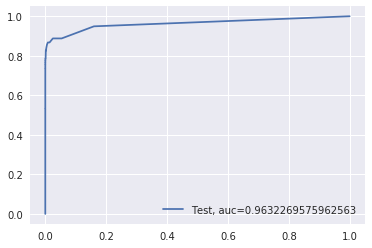

XGBoost Model
[16:25:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9993855444953564
Confusion Matrix


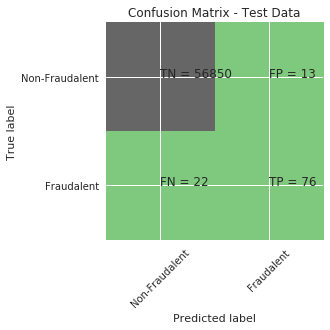

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.78      0.81        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.970320537690482
XGBoost threshold: 0.001699125044979155
ROC for the test dataset 97.0%


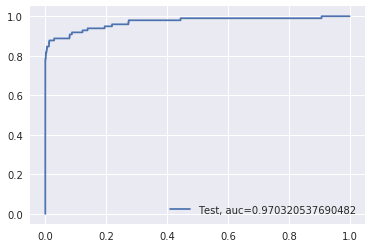

In [79]:
Data_Imbalance_Handiling = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")

df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)

#Run KNN Model
print("KNN Model")

df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)

#Run Random Forest Model
print("Random Forest Model")

df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)

#Run XGBoost Model
print("XGBoost Model")

df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)

In [80]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337,1.000000
5,Power Transformer,Random Forest,0.999350,0.940564,0.010000
6,Power Transformer,XGBoost,0.999456,0.972998,0.000051
7,Power Transformer,SVM,0.998560,0.891340,0.000984
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998771,0.983287,0.001583
9,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998754,0.889076,0.021087


<b>Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results.<b>

### Tune the Hyoer parameters for XGBoost

In [84]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
              param_grid = param_test, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[18:00:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 95.85769677, 104.96196556, 113.68856058,  96.3240447 ,
         104.71462865, 113.58697839,  96.19088554, 105.30577712,
         113.82294898, 142.07662201, 154.96642241, 168.36630611,
         142.81418576, 155.62574644, 168.85587277, 143.19570394,
         156.1782289 , 169.46264734, 189.32031541, 206.31459665,
         224.21916041, 189.59545465, 207.43664727, 224.84025631,
         190.77981997, 207.77855353, 205.17775722]),
  'std_fit_time': array([ 0.18069567,  0.19975879,  0.11996638,  0.07575201,  0.29853292,
          0.51158943,  0.24458636,  0.464416  ,  0.31676012,  0.3388831 ,
          0.69560239,  0.27043689,  0.13809446,  0.16076177,  0.28229785,
          0.12090057,  0.1673345 ,  0.31397122,  0.46514548,  0.53676778,
          0.42763248,  0.54007004,  0.51993742,  0.56978998,  0.52165723,
          0.37570689, 31.11713612]),
  'mean_score_time': array([0.17083554, 0.17118587, 0.17999001, 0.16688938, 0.17025943,
         0.17842884, 0.164758

### Evaluate the Final Model

In [86]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

[18:03:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9989466477063254
XGboost roc_value: 0.9779997537942071
XGBoost threshold: 0.0195295549929142


### Print the important features of the best model to understand the dataset

In [88]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
#top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
#second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

#np.random.shuffle(X_train_0)

#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams['figure.figsize'] = [20, 20]

#plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
#plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
#            label='Actual Class-0 Examples')
#plt.legend()

Top var = 14
2nd Top var = 10
3rd Top var = 12


In [90]:
#### Print the FPR,TPR & select the best threshold from the roc curve

print('Train auc =', metrics.roc_auc_score(y_test, XGB_probs))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9779997537942071
0.019529555


### Conclusion

<b>Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. 

Model Accuracy: 0.9989466477063254
    

XGboost roc_value: 0.9779997537942071

XGBoost threshold: 0.019529555<b>